<a href="https://colab.research.google.com/github/adenadit/My-Data-Science-Site/blob/main/Numpy/Basic/6_Fancy_Indexing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploring Fancy Indexing**

In [2]:
import numpy as np

In [16]:
rand = np.random.RandomState(42)

In [ ]:
x = rand.randint(100, size=10)

In [ ]:
print(x)

[87 99 23  2 21 52  1 87 29 37]


>kemudian kita membentuk array baru dengan nilai yang telah ada sebelumnya

In [ ]:
[x[2],x[7],x[4]]

[23, 87, 21]

>atau dengan alternative lain seperti

In [ ]:
ind = [2,7,4]
x[ind]

array([23, 87, 21])

>atau seandainya kita ingin memasukann ke format 2 dmiensi array

In [ ]:
ind = np.array([[2,7],[3,7]])
x[ind]

array([[23, 87],
       [ 2, 87]])

>fancy indexing memungkinkan kita bekerja dengan multiple dimensi sekalipun

In [ ]:
x1 = np.arange(12).reshape((3,4))
print(x1)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


>kemudian kita menginginkan untuk membuat lagi array baru berdasarkan array x1 dengan mengambil data pada (0,1),(2,3),dan (2,2).
maka dapat dituliskan menjadi

In [ ]:
row =np.array([0,2,2])
col = np.array([1,3,2])
x1[row,col]

array([ 1, 11, 10])

>kemudian untuk membuat sebuah array dengan acuan colom dengan nilai baru yang terteramerupakan baris dari kolom tersebut

In [ ]:
x1[row[:, np.newaxis],col]

array([[ 1,  3,  2],
       [ 9, 11, 10],
       [ 9, 11, 10]])

>ataupun kita ingin menampilkan nilai dari hasil aritmatik antara baris dan colom

In [ ]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 6, 4],
       [2, 6, 4]])

# **Combined Indexing**

>dengan hal ini memungkinkan kita mengkombinasikan inedx dari suatu array

In [ ]:
print(x1)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [ ]:
x1[2,[2,0,1]]     #memanggil index pada (2,2),(2,0) dan (2,1)

array([10,  8,  9])

>atau mengabungkan metode dengan slicing

In [ ]:
x1[1:,[2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

>dan kita juga dapat mengkombinasikan fancy indexing dengan masking

In [ ]:
mask = np.array([1,0,1,0],dtype=bool)
x1[row[:,np.newaxis],mask]

array([[ 0,  2],
       [ 8, 10],
       [ 8, 10]])

# **Example : Selecting Random Points**

Salah satu penggunaan umum pengindeksan mewah adalah pemilihan himpunan bagian baris dari suatu matriks.
Misalnya, kita mungkin memiliki matriks N kali D yang mewakili N titik dalam dimensi D, seperti titik-titik berikut yang diambil dari distribusi normal dua dimensi:

In [17]:
mean = [0,0]
cov = [[1,2],
       [2,5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

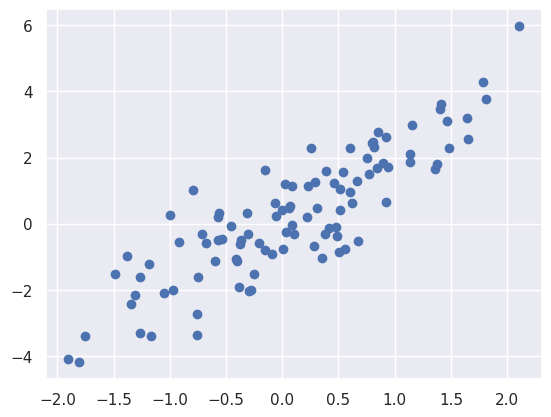

In [18]:
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.scatter(X[:,0], X[:,1]);

In [ ]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([41, 79, 38, 23, 52,  6,  2, 34, 35, 62, 36, 97,  9, 90, 32, 14,  5,
       89, 15, 37])

In [ ]:
selection = X[indices]        # Fancy Indexing
selection.shape

(20, 2)

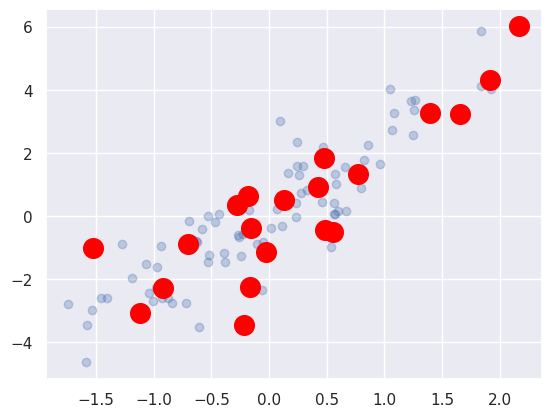

In [ ]:
plt.scatter(X[:,0],X[:,1], alpha=0.3)
plt.scatter(selection[:,0],selection[:,1],
            facecolor='red', s = 200);

# **Modifying Values with Fancy Indexing**

In [3]:
a = np.arange(10)
b = np.array([2, 1, 8, 4])
a[b] = 99

print(a)

[ 0 99 99  3 99  5  6  7 99  9]


In [5]:
a[b] -= 20
print(a)

[ 0 59 59  3 59  5  6  7 59  9]


In [6]:
c = np.zeros(10)
c[[0, 0]] = [4, 6]
print(c)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [7]:
d = [2, 3, 3, 4, 4, 4]
c[d] += 1

print(c)

[6. 0. 1. 1. 1. 0. 0. 0. 0. 0.]


In [9]:
c = np.zeros(10)
np.add.at(c, d, 1)
print(c)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


# **Example : Binning Data**

In [10]:
np.random.seed(42)
e = np.random.randn(100)

In [11]:
# hitung sebuah histogram
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins)

In [12]:
# temukan wadah yang sesuai untuk setiap e
i = np.searchsorted(bins, e)


In [13]:
np.add.at(counts, i, 1)

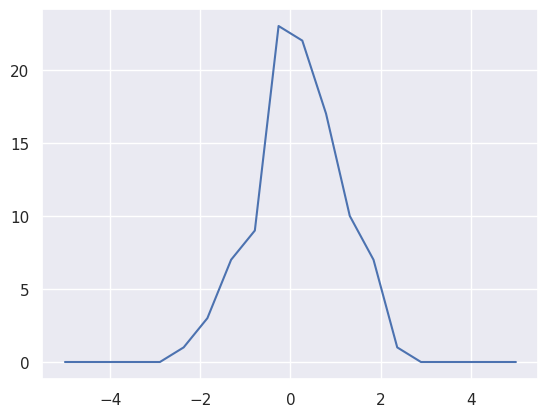

In [23]:
# tampilkan plot
plt.plot(bins, counts, linestyle='solid');


(array([ 0.,  0.,  0.,  0.,  1.,  3.,  7.,  9., 23., 22., 17., 10.,  7.,
         1.,  0.,  0.,  0.,  0.,  0.]),
 array([-5.        , -4.47368421, -3.94736842, -3.42105263, -2.89473684,
        -2.36842105, -1.84210526, -1.31578947, -0.78947368, -0.26315789,
         0.26315789,  0.78947368,  1.31578947,  1.84210526,  2.36842105,
         2.89473684,  3.42105263,  3.94736842,  4.47368421,  5.        ]),
 [<matplotlib.patches.Polygon at 0x7e92cb7e3910>])

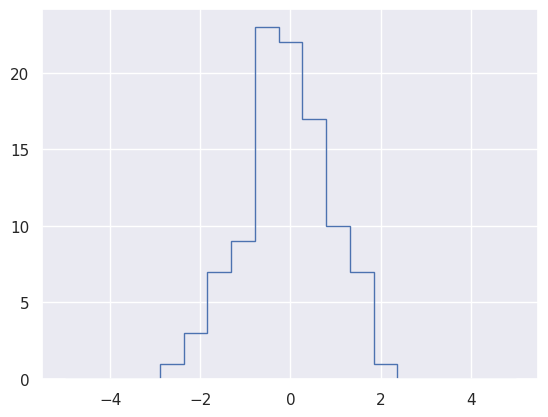

In [24]:
plt.hist(e, bins, histtype='step')

In [27]:
print("Numpy routine : ")
%timeit counts, edges = np.histogram(e,bins)

Numpy routine : 
37 µs ± 9.7 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [29]:
print("Custom routine : ")
%timeit np.add.at(counts, np.searchsorted(bins, e), 1)

Custom routine : 
19.2 µs ± 446 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [30]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)
print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
85.4 ms ± 773 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
191 ms ± 52.9 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
